In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sympy as sym
# Heaviside numerics workaround
sympy_modules = [{'Heaviside': lambda x: np.heaviside(x,0.5)}, 'numpy']
from functools import reduce

import numpy as np
import numpy.linalg as la

import pickle

In [46]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# Final 2022/02/10

In [75]:
# display_mode = 'display'
display_mode = 'latex'
def my_display(expr):
    if display_mode == 'latex':
        print(sym.latex(expr))
    else:
        display(expr)
    return None

In [72]:
ξ, y = sym.symbols('\\xi y', real=True)
α, β, c, Δ, μ = sym.symbols('\\alpha, \\beta, c, \\Delta \\mu', positive=True)
Q_right = 1
Q_mid = 1/(1+α*β)*(1 + α*β*sym.exp((1+α*β)/(c*α)*ξ))
Q_left = 1 + α*β/(1+α*β)*(sym.exp(-β*Δ/c) - sym.exp(Δ/(α*c)))*sym.exp(ξ/(α*c))
Q = sym.Piecewise((Q_left, ξ<-Δ), (Q_mid, ξ<0), (Q_right, True))
my_display(sym.Eq(sym.Function('Q')(ξ), Q))

Eq(Q(\xi), Piecewise((\alpha*\beta*(-exp(\Delta/(\alpha*c)) + exp(-\Delta*\beta/c))*exp(\xi/(\alpha*c))/(\alpha*\beta + 1) + 1, \Delta < -\xi), ((\alpha*\beta*exp(\xi*(\alpha*\beta + 1)/(\alpha*c)) + 1)/(\alpha*\beta + 1), \xi < 0), (1, True)))

In [73]:
B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12, B13 = sym.symbols([f'B_{i}' for i in range(1, 14)])
r1, r2 = sym.symbols('r_1 r_2')

assumptions = []
sub_dict = {r1: (1+α*β)/(c*α)}
sub_dict[B1] = 1/(1+α*β)
sub_dict[B2] = α*β/(1+α*β)

B3_integral_result = sym.integrate(sym.Rational(1,2)*sym.exp(-y)*(B1 + B2*sym.exp(r1*y)), (y, -Δ, 0) )
sub_dict[B3] = B3_integral_result.args[0][0].subs(sub_dict).simplify()
assumptions += [B3_integral_result.args[0][1]]

B4_integral_result = sym.integrate(sym.Rational(1,2)*sym.exp(y)*(B1 + B2*sym.exp(r1*y)), (y, -Δ, 0) )
sub_dict[B4] = B4_integral_result.args[0][0].subs(sub_dict).simplify()
assumptions += [B4_integral_result.args[0][1]]

sub_dict[B5] = (B2/(1+r1)).subs(sub_dict)
sub_dict[B6] = (-B1*sym.exp(-Δ) - B2/(1+r1)*sym.exp(-(1+r1)*Δ)).subs(sub_dict)
sub_dict[B7] = (-B2/(r1-1)).subs(sub_dict)
sub_dict[B8] = (-B1 + B2/(r1-1)).subs(sub_dict)

sub_dict[B9] = (B6/2/(1+c*μ)).subs(sub_dict)
sub_dict[B10] = (B8/2/(1-c*μ)).subs(sub_dict)
sub_dict[B11] = ((B5+B7)/2/(1-r1*c*μ)).subs(sub_dict)
sub_dict[B12] = (B3/(1-c*μ)).subs(sub_dict)
sub_dict[B13] = (B4/(1+c*μ)).subs(sub_dict)


for key, val in sub_dict.items():
    sub_dict[key] = val.simplify()

print('Assuming')
for assumption in assumptions:
    my_display(assumption.subs(sub_dict))
    
print('with')
for key, val in sub_dict.items():
    my_display(sym.Eq(key, val))

AL, AM = sym.symbols('A_L A_M')
U_left = B12*sym.exp(ξ) + AL*sym.exp(ξ/(c*μ))
U_right = B13*sym.exp(-ξ)
U_mid = B1 + B9*sym.exp(-ξ) + B10*sym.exp(ξ) + B11*sym.exp(r1*ξ) + AM*sym.exp(ξ/(c*μ))
U = sym.Piecewise((U_left, ξ<-Δ), 
                  (U_mid, ξ<0), 
                  (U_right, True))

AM_subs = sym.solve( (U_right - U_mid).subs(ξ,0), AM)[0]
sub_dict[AM] = AM_subs.subs(sub_dict)
my_display(sym.Eq(AM, AM_subs))

AL_subs = sym.solve( (U_left - U_mid).subs(ξ,-Δ), AL)[0]
sub_dict[AL] = AL_subs.subs(sub_dict)
my_display(sym.Eq(AL, AL_subs))

my_display(sym.Eq(sym.Function('U')(ξ), U))

Assuming


Ne((\alpha*\beta + 1)/(\alpha*c), 1)

True

with


Eq(r_1, (\alpha*\beta + 1)/(\alpha*c))

Eq(B_1, 1/(\alpha*\beta + 1))

Eq(B_2, \alpha*\beta/(\alpha*\beta + 1))

Eq(B_3, (-\alpha**2*\beta*c*exp(\Delta) + \alpha*c*(\alpha*\beta - exp(\Delta) + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) - (1 - exp(\Delta))*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\alpha*\beta - \alpha*c + 1)))

Eq(B_4, (-\alpha**2*\beta*c + \alpha*c*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)) - \alpha*c*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) - (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) + (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(B_5, \alpha**2*\beta*c/((\alpha*\beta + 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(B_6, -(\alpha**2*\beta*c*exp(\Delta) + (\alpha*\beta + \alpha*c + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + 2*\alpha*c + 1)/(\alpha*c))/((\alpha*\beta + 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(B_7, \alpha**2*\beta*c/((\alpha*\beta + 1)*(-\alpha*\beta + \alpha*c - 1)))

Eq(B_8, (-\alpha*c + 1)/(-\alpha*\beta + \alpha*c - 1))

Eq(B_9, -(\alpha**2*\beta*c*exp(\Delta) + (\alpha*\beta + \alpha*c + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + 2*\alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(B_10, (\alpha**2*\beta*c - \alpha*\beta + \alpha*c - 1)/(2*(\alpha*\beta + 1)*(\mu*c - 1)*(-\alpha*\beta + \alpha*c - 1)))

Eq(B_11, \alpha**4*\beta*c**2/((\alpha - \mu*(\alpha*\beta + 1))*(\alpha*\beta + 1)*(-\alpha*\beta + \alpha*c - 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(B_12, (\alpha**2*\beta*c*exp(\Delta) - \alpha*c*(\alpha*\beta - exp(\Delta) + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) + (1 - exp(\Delta))*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c - 1)*(\alpha*\beta - \alpha*c + 1)))

Eq(B_13, (-\alpha**2*\beta*c + \alpha*c*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)) - \alpha*c*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) - (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) + (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1)))

Eq(A_M, -B_1 - B_10 - B_11 + B_13 - B_9)

Eq(A_L, A_M + B_1*exp(\Delta/(\mu*c)) + B_10*exp(-\Delta + \Delta/(\mu*c)) + B_11*exp(-\Delta*r_1 + \Delta/(\mu*c)) - B_12*exp(-\Delta + \Delta/(\mu*c)) + B_9*exp(\Delta + \Delta/(\mu*c)))

Eq(U(\xi), Piecewise((A_L*exp(\xi/(\mu*c)) + B_12*exp(\xi), \Delta < -\xi), (A_M*exp(\xi/(\mu*c)) + B_1 + B_10*exp(\xi) + B_11*exp(\xi*r_1) + B_9*exp(-\xi), \xi < 0), (B_13*exp(-\xi), True)))

In [77]:
θ = sym.symbols('\\theta', positive=True)
eq1 = U_mid.subs(ξ, 0) - θ
my_display(sym.Eq(0, eq1))
eq2 = U_mid.subs(ξ, -Δ) - θ
my_display(sym.Eq(0, eq2))

0 = A_{M} + B_{1} + B_{10} + B_{11} + B_{9} - \theta
0 = A_{M} e^{- \frac{\Delta}{\mu c}} + B_{1} + B_{10} e^{- \Delta} + B_{11} e^{- \Delta r_{1}} + B_{9} e^{\Delta} - \theta


In [51]:
display(eq1.subs(sub_dict))
display(eq2.subs(sub_dict))

-\theta + (-\alpha**2*\beta*c + \alpha*c*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)) - \alpha*c*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) - (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) + (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1))

\alpha**4*\beta*c**2*exp(-\Delta*(\alpha*\beta + 1)/(\alpha*c))/((\alpha - \mu*(\alpha*\beta + 1))*(\alpha*\beta + 1)*(-\alpha*\beta + \alpha*c - 1)*(\alpha*\beta + \alpha*c + 1)) - \theta + (-\alpha**4*\beta*c**2/((\alpha - \mu*(\alpha*\beta + 1))*(\alpha*\beta + 1)*(-\alpha*\beta + \alpha*c - 1)*(\alpha*\beta + \alpha*c + 1)) - 1/(\alpha*\beta + 1) + (\alpha**2*\beta*c*exp(\Delta) + (\alpha*\beta + \alpha*c + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + 2*\alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1)) + (-\alpha**2*\beta*c + \alpha*c*(\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)) - \alpha*c*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) - (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + 1)/(\alpha*c)) + (\alpha*\beta + 1)*exp(\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c)))*exp(-\Delta*(\alpha*\beta + \alpha*c + 1)/(\alpha*c))/(2*(\alpha*\beta + 1)*(\mu*c + 1)*(\alpha*\beta + \alpha*

# Numerics

In [52]:
params = {
    θ : .2,
    α : 20,
    β : .25,
    μ : 1,
}

In [53]:
f1 = eq1.subs(sub_dict).subs(params).expand().collect(sym.exp(Δ)).collect(sym.exp(Δ/c))
display(f1)

10.0*c/(20*c**2 + 26.0*c + 6.0) + (-1.66666666666667*c/(20*c**2 + 26.0*c + 6.0) - 8.33333333333333*c*exp(-0.3*\Delta/c)/(20*c**2 + 26.0*c + 6.0) - 0.5/(20*c**2 + 26.0*c + 6.0))*exp(-\Delta) - 0.2 + 0.5/(20*c**2 + 26.0*c + 6.0)

In [54]:
f2 = eq2.subs(sub_dict).subs(params).expand().collect(sym.exp(Δ)).collect(sym.exp(Δ/c))
display(f2)

-1.66666666666667*c/(20*c**2 + 26.0*c + 6.0) + (10.0*c/(20*c**2 - 26.0*c + 6.0) - 0.5/(20*c**2 - 26.0*c + 6.0))*exp(-\Delta) + (10.0*c/(20*c**2 + 26.0*c + 6.0) + 0.5/(20*c**2 + 26.0*c + 6.0))*exp(-1.0*\Delta/c) + (476.190476190476*c**2/(400*c**2 - 36.0) - 8.33333333333333*c/(20*c**2 + 26.0*c + 6.0))*exp(-0.3*\Delta/c) + (-476.190476190476*c**2/(400*c**2 - 36.0) - 10.0*c/(20*c**2 - 26.0*c + 6.0) - 0.166666666666667 + 0.5/(20*c**2 - 26.0*c + 6.0))*exp(-\Delta/c) - 0.0333333333333334 - 0.5/(20*c**2 + 26.0*c + 6.0)

In [55]:
F = sym.Matrix([[f1],[f2]])
vec = sym.Matrix([[c],[Δ]])
J = F.jacobian(vec)

F_numeric_raw = sym.lambdify(vec, F)
F_numeric = lambda tup: F_numeric_raw(*tup).reshape(2)
J_numeric_raw = sym.lambdify(vec, J)
J_numeric = lambda tup: J_numeric_raw(*tup)

In [56]:
F_numeric((3, 4))

array([-0.0860139 ,  0.29096326])

In [57]:
J_numeric((3,4))

array([[-0.02581717,  0.00166047],
       [-0.03525273,  0.05489089]])

In [58]:
x = np.array([1.2, 12], dtype='float')
for _ in range(20):
    print(x)
    x -= la.solve(J_numeric(x), F_numeric(x))
print(x, F_numeric(x))
params[c], params[Δ] = x



[ 1.2 12. ]
[1.02564122 8.9527535 ]
[1.03005    9.32505165]
[1.03004545 9.34259085]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285]
[1.03004544 9.34263285] [3.46944695e-18 3.46944695e-18]


In [59]:
for key, val in sub_dict.items():
    display(sym.Eq(key, val.subs(params)))

Eq(r_1, 0.29124928819074)

Eq(B_1, 0.166666666666667)

Eq(B_2, 0.833333333333333)

Eq(B_3, 1392.11988420956)

Eq(B_4, 0.406009087173136)

Eq(B_5, 0.645369829787844)

Eq(B_6, -1.83221082392493e-5)

Eq(B_7, 1.17577777270381)

Eq(B_8, -1.34244443937048)

Eq(B_9, -4.51273353678316e-6)

Eq(B_10, 22.3402390528132)

Eq(B_11, 1.30081971606547)

Eq(B_12, -46333.8222295445)

Eq(B_13, 0.2)

Eq(r_2, 1.9708309606358)

Eq(A_M, -23.6077209228118)

Eq(A_L, 37019.7517334255)

In [60]:
params

{\theta: 0.2,
 \alpha: 20,
 \beta: 0.25,
 \mu: 1,
 c: 1.0300454358656792,
 \Delta: 9.342632848278724}

In [61]:
Q_numeric = sym.lambdify(ξ, Q.subs(params))
U_numeric = sym.lambdify(ξ, U.subs(sub_dict).subs(params))

# Traveling Pulse Figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


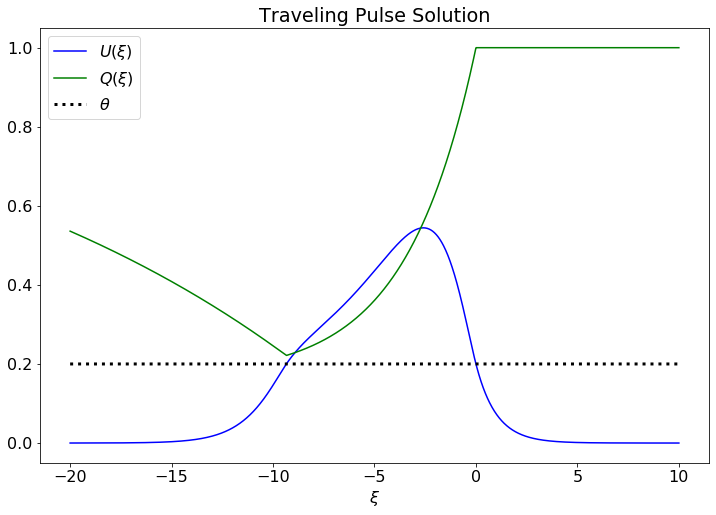

{\theta: 0.2, \alpha: 20, \beta: 0.25, \mu: 1, c: 1.0300454358656792, \Delta: 9.342632848278724}


In [91]:
xs = np.linspace(-20,10, 2001)

plt.figure(figsize=(12,8))

plt.plot(xs, U_numeric(xs), 'b-', label='$U(\\xi)$')
plt.plot(xs, Q_numeric(xs), 'g-', label='$Q(\\xi)$')
plt.plot(xs, params[θ] + 0*xs, 'k:', label='$\\theta$', linewidth=3)
plt.legend()
plt.title('Traveling Pulse Solution')
plt.xlabel('$\\xi$')

plt.savefig('traveling_pulse.eps')

plt.show()
print(params)

# Generated Code

In [63]:
def py_code(expr, replace_numpy=True, replace_unicode=True, numpy_package='np.'):
    code = sym.ccode(expr)
    
    if replace_unicode:
        unicode_replacements = [
            ('\\alpha', 'α'),
            ('\\beta', 'β'),
            ('\\gamma', 'γ'),
            ('\\Gamma', 'Γ'),
            ('\\delta', 'δ'),
            ('\\Delta', 'Δ'),
            ('\\epsilon', 'ϵ'),
            ('\\zeta', 'ζ'),
            ('\\eta', 'η'),
            ('\\theta', 'θ'),
            ('\\xi', 'ξ'),
            ('\\mu', 'μ')
        ]
        for unicode, symbol in unicode_replacements:
            code = code.replace(unicode, symbol)
    
    if replace_numpy:
        numpy_replacements = [
            ('exp', numpy_package + 'exp'),
            ('log', numpy_package + 'log'),
            ('pow', '( lambda base, exponent: base**exponent )'),
            ('Heaviside', '(lambda input: np.heaviside(input,0.5))')
        ]
        for c_func, np_func in numpy_replacements:
            code = code.replace(c_func, np_func)
        
    return code

In [65]:
U_code = sym.Heaviside(-ξ-Δ)*U_left + sym.Heaviside(ξ+Δ)*sym.Heaviside(-ξ)*U_mid + sym.Heaviside(ξ)*U_right
code = 'def Unum(ξ, θ, α, β, μ, c, Δ):\n\treturn ' + py_code(U_code.subs(sub_dict))
print(code)

Q_code = sym.Heaviside(-ξ-Δ)*Q_left + sym.Heaviside(ξ+Δ)*sym.Heaviside(-ξ)*Q_mid + sym.Heaviside(ξ)*Q_right
code = 'def Qnum(ξ, θ, α, β, μ, c, Δ):\n\treturn ' + py_code(Q_code.subs(sub_dict))
print(code)

def Unum(ξ, θ, α, β, μ, c, Δ):
	return // Not supported in C:
// (lambda input: np.heaviside(input,0.5))
// (lambda input: np.heaviside(input,0.5))
// (lambda input: np.heaviside(input,0.5))
// (lambda input: np.heaviside(input,0.5))
((( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c) - Δ*(α*β + 1)/(α*c))/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) - ( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) + np.exp(Δ/(μ*c))/(α*β + 1) - 1/(α*β + 1) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + 2*α*c + 1)/(α*c))*np.exp(Δ + Δ/(μ*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + 2*

In [66]:
def Unum(ξ, θ, α, β, μ, c, Δ):
    return ((( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c) - Δ*(α*β + 1)/(α*c))/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) - ( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) + np.exp(Δ/(μ*c))/(α*β + 1) - 1/(α*β + 1) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + 2*α*c + 1)/(α*c))*np.exp(Δ + Δ/(μ*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + 2*α*c + 1)/(α*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) + (1.0/2.0)*(-( lambda base, exponent: base**exponent )(α, 2)*β*c + α*c*(α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)) - α*c*np.exp(Δ*(α*β + 1)/(α*c)) - (α*β + 1)*np.exp(Δ*(α*β + 1)/(α*c)) + (α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + α*c + 1)/(α*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) - α*c*(α*β - np.exp(Δ) + 1)*np.exp(Δ*(α*β + 1)/(α*c)) + (1 - np.exp(Δ))*(α*β + 1)*np.exp(Δ*(α*β + 1)/(α*c)))*np.exp(-Δ*(α*β + 1)/(α*c))*np.exp(-Δ + Δ/(μ*c))/((α*β + 1)*(μ*c - 1)*(α*β - α*c + 1)) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c - α*β + α*c - 1)*np.exp(-Δ + Δ/(μ*c))/((α*β + 1)*(μ*c - 1)*(-α*β + α*c - 1)) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c - α*β + α*c - 1)/((α*β + 1)*(μ*c - 1)*(-α*β + α*c - 1)))*np.exp(ξ/(μ*c)) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) - α*c*(α*β - np.exp(Δ) + 1)*np.exp(Δ*(α*β + 1)/(α*c)) + (1 - np.exp(Δ))*(α*β + 1)*np.exp(Δ*(α*β + 1)/(α*c)))*np.exp(ξ)*np.exp(-Δ*(α*β + 1)/(α*c))/((α*β + 1)*(μ*c - 1)*(α*β - α*c + 1)))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + (( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)*np.exp(ξ*(α*β + 1)/(α*c))/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) + (-( lambda base, exponent: base**exponent )(α, 4)*β*( lambda base, exponent: base**exponent )(c, 2)/((α - μ*(α*β + 1))*(α*β + 1)*(-α*β + α*c - 1)*(α*β + α*c + 1)) - 1/(α*β + 1) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + 2*α*c + 1)/(α*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) + (1.0/2.0)*(-( lambda base, exponent: base**exponent )(α, 2)*β*c + α*c*(α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)) - α*c*np.exp(Δ*(α*β + 1)/(α*c)) - (α*β + 1)*np.exp(Δ*(α*β + 1)/(α*c)) + (α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-Δ*(α*β + α*c + 1)/(α*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c - α*β + α*c - 1)/((α*β + 1)*(μ*c - 1)*(-α*β + α*c - 1)))*np.exp(ξ/(μ*c)) + 1.0/(α*β + 1) - 1.0/2.0*(( lambda base, exponent: base**exponent )(α, 2)*β*c*np.exp(Δ) + (α*β + α*c + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-ξ)*np.exp(-Δ*(α*β + 2*α*c + 1)/(α*c))/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1)) + (1.0/2.0)*(( lambda base, exponent: base**exponent )(α, 2)*β*c - α*β + α*c - 1)*np.exp(ξ)/((α*β + 1)*(μ*c - 1)*(-α*β + α*c - 1)))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ) + (1.0/2.0)*(-( lambda base, exponent: base**exponent )(α, 2)*β*c + α*c*(α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)) - α*c*np.exp(Δ*(α*β + 1)/(α*c)) - (α*β + 1)*np.exp(Δ*(α*β + 1)/(α*c)) + (α*β + 1)*np.exp(Δ*(α*β + α*c + 1)/(α*c)))*np.exp(-ξ)*np.exp(-Δ*(α*β + α*c + 1)/(α*c))*(lambda input: np.heaviside(input,0.5))(ξ)/((α*β + 1)*(μ*c + 1)*(α*β + α*c + 1))
def Qnum(ξ, θ, α, β, μ, c, Δ):
    return (α*β*(-np.exp(Δ/(α*c)) + np.exp(-Δ*β/c))*np.exp(ξ/(α*c))/(α*β + 1) + 1)*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + (lambda input: np.heaviside(input,0.5))(ξ) + (α*β*np.exp(ξ*(α*β + 1)/(α*c)) + 1)*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ)/(α*β + 1)

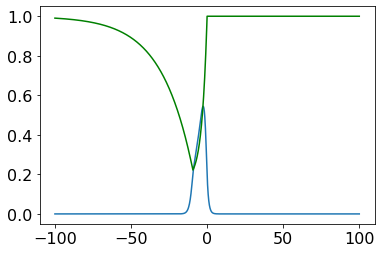

In [67]:
xs = np.linspace(-100, 100, 2001)
plt.plot(xs, Unum(xs, *params.values()))
plt.plot(xs, Qnum(xs, *params.values()), 'g-')
plt.show()